In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame({'x':[0.1, 1.3, 2,2.9, 3.6, 5.1], 'y': [0,0,1,0,1,1]})

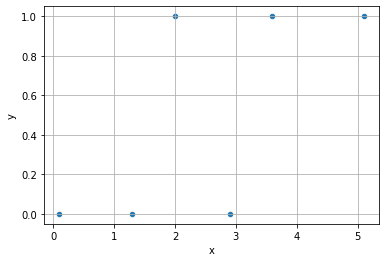

In [ ]:
df.plot(x='x',y='y',kind='scatter',grid=True)

In [ ]:
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.grid()
    plt.plot(x, m * x + b)
    plt.scatter(df['x'],df['y'])
    plt.xlim(-1,7)
    plt.ylim(-1, 3)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In [ ]:
df

,x,y
0,0.1,0
1,1.3,0
2,2.0,1
3,2.9,0
4,3.6,1
5,5.1,1


In [ ]:
m,b = 1,1
n = 100
df['pred'] = m * df['x'] + b
nu = 0.1
for i in range(n):


  df['err'] = df['y'] - df['pred']

  df['m_change'] = df['x'] * np.sign(df['err'])
  df['b_change'] = np.sign(df['err'])

  m += nu*df['m_change'].mean()
  b += nu*df['b_change'].mean()

  df['pred'] = m * df['x'] + b

  df['err'] = df['y'] - df['pred']
  df['err_abs'] = np.abs(df['err'])
  if i % 10 == 0:
    print(df['err_abs'].mean())

2.275
0.5035555555555556
0.3471111111111111
0.3872222222222224
0.35888888888888903
0.3588888888888888
0.3588888888888886
0.3588888888888884
0.3588888888888882
0.358888888888888


In [ ]:
m,b

(0.17666666666666603, -0.033333333333333125)

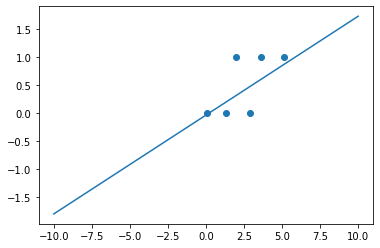

In [ ]:
x = np.linspace(-10, 10, num=1000)
plt.plot(x, m * x + b)
plt.scatter(df['x'],df['y'])

In [ ]:
df

,x,y,pred,err,m_change,b_change,err_abs
0,0.1,0,-0.015667,0.015667,0.1,1.0,0.015667
1,1.3,0,0.196333,-0.196333,-1.3,-1.0,0.196333
2,2.0,1,0.320000,0.680000,2.0,1.0,0.680000
3,2.9,0,0.479000,-0.479000,-2.9,-1.0,0.479000
4,3.6,1,0.602667,0.397333,3.6,1.0,0.397333
5,5.1,1,0.867667,0.132333,-5.1,-1.0,0.132333


In [ ]:
df

,x,y,pred,err,m_change,b_change,err_abs
0,0.1,0,-0.015667,0.015667,0.1,1.0,0.015667
1,1.3,0,0.196333,-0.196333,-1.3,-1.0,0.196333
2,2.0,1,0.320000,0.680000,2.0,1.0,0.680000
3,2.9,0,0.479000,-0.479000,-2.9,-1.0,0.479000
4,3.6,1,0.602667,0.397333,3.6,1.0,0.397333
5,5.1,1,0.867667,0.132333,-5.1,-1.0,0.132333


In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(df['y'],df['pred'])

0.888888888888889

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(df[['x']],df['y'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.predict_proba(df[['x']])[:,1]

array([0.13704651, 0.28656152, 0.40833095, 0.58055537, 0.70398089,
       0.88352048])

In [ ]:
df['lr_pred'] = lr.predict_proba(df[['x']])[:,1]

In [ ]:
roc_auc_score(df['y'],df['lr_pred'])

0.888888888888889

In [ ]:
df

,x,y,pred,err,m_change,b_change,err_abs,lr_pred
0,0.1,0,-0.015667,0.015667,0.1,1.0,0.015667,0.137047
1,1.3,0,0.196333,-0.196333,-1.3,-1.0,0.196333,0.286562
2,2.0,1,0.320000,0.680000,2.0,1.0,0.680000,0.408331
3,2.9,0,0.479000,-0.479000,-2.9,-1.0,0.479000,0.580555
4,3.6,1,0.602667,0.397333,3.6,1.0,0.397333,0.703981
5,5.1,1,0.867667,0.132333,-5.1,-1.0,0.132333,0.883520


In [ ]:
df[['x','y','pred','lr_pred']]

,x,y,pred,lr_pred
0,0.1,0,-0.015667,0.137047
1,1.3,0,0.196333,0.286562
2,2.0,1,0.320000,0.408331
3,2.9,0,0.479000,0.580555
4,3.6,1,0.602667,0.703981
5,5.1,1,0.867667,0.883520


r f m
recency frequency monetary
как давно, как часто, как много денег,

1: 1, 2, 2300
2: 2, 1, 1500

0-1, 0-1, 0-1,

1: 1*0.8, *0.8, 1*0.9 = 0-3
2: 0.4, 0.5, 0.6 = 0-3

0, 1


In [ ]:
np.exp(2)

7.38905609893065

In [ ]:
np.e**2

7.3890560989306495

In [ ]:
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.grid()
    plt.plot(x, 1/(1+np.exp(-(m * x + b))))
    plt.scatter(df['x'],df['y'])
    plt.xlim(-1,7)
    plt.ylim(-1, 3)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In [ ]:
from sympy import *

In [ ]:
x_ = Symbol('x',real=True)
y_ = Symbol('y',real=True)
m_ = Symbol('m',real=True)
b_ = Symbol('b',real=True)

In [ ]:
e = Abs(y_ - 1/(1+exp(-m_*x_-b_)))

In [ ]:
e

Abs(y - 1/(exp(-b - m*x) + 1))

In [ ]:
#init_printing(use_latex='matplotlib')

In [ ]:
e

Abs(y - 1/(exp(-b - m*x) + 1))

In [ ]:
diff(e,m_)

-x*exp(-b - m*x)*sign(y - 1/(exp(-b - m*x) + 1))/(exp(-b - m*x) + 1)**2

In [ ]:
diff(e,b_)

-exp(-b - m*x)*sign(y - 1/(exp(-b - m*x) + 1))/(exp(-b - m*x) + 1)**2

In [ ]:
df

,x,y,pred,err,m_change,b_change,err_abs,lr_pred
0,0.1,0,-0.015667,0.015667,0.1,1.0,0.015667,0.137047
1,1.3,0,0.196333,-0.196333,-1.3,-1.0,0.196333,0.286562
2,2.0,1,0.320000,0.680000,2.0,1.0,0.680000,0.408331
3,2.9,0,0.479000,-0.479000,-2.9,-1.0,0.479000,0.580555
4,3.6,1,0.602667,0.397333,3.6,1.0,0.397333,0.703981
5,5.1,1,0.867667,0.132333,-5.1,-1.0,0.132333,0.883520


In [ ]:
df = df[['x','y']].copy()

In [ ]:
df

,x,y
0,0.1,0
1,1.3,0
2,2.0,1
3,2.9,0
4,3.6,1
5,5.1,1


In [ ]:
df = df[['x','y']].copy()
m,b = 1,1
n = 100
df['pred'] = 1/(1+np.exp(-(m * df['x'] + b)))

nu = 0.01
for i in range(n):


  df['err'] = df['y'] - df['pred']

  df['m_change'] = df['x']*np.sign(df['err'])
  df['b_change'] = np.sign(df['err'])

  m += nu*df['m_change'].mean()
  b += nu*df['b_change'].mean()

  df['pred'] = 1/(1+np.exp(-(m * df['x'] + b)))

  df['err'] = df['y'] - df['pred']
  df['err_abs'] = np.abs(df['err'])
  if i % 10 == 0:
    print(df['err_abs'].mean())

0.449900457125431
0.45077635467234617
0.45171286773714164
0.45266475657024535
0.4536048003359278
0.454517029325358
0.45539253885809483
0.45622688586075316
0.4570184539401135
0.4577674135522825


In [ ]:
df

,x,y,pred,err,m_change,b_change,err_abs
0,0.1,0,0.769709,-0.769709,-0.1,-1.0,0.769709
1,1.3,0,0.975557,-0.975557,-1.3,-1.0,0.975557
2,2.0,1,0.994138,0.005862,2.0,1.0,0.005862
3,2.9,0,0.999083,-0.999083,-2.9,-1.0,0.999083
4,3.6,1,0.999784,0.000216,3.6,1.0,0.000216
5,5.1,1,0.999990,0.000010,5.1,1.0,0.000010


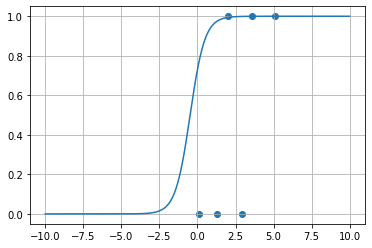

In [ ]:
x = np.linspace(-10, 10, num=1000)
plt.grid()
plt.plot(x, 1/(1+np.exp(-(m * x + b))))
plt.scatter(df['x'],df['y'])

In [ ]:
lr = LogisticRegression()
lr.fit(df[['x']],df['y'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
df['lr_pred'] = lr.predict_proba(df[['x']])[:,1]

In [ ]:
lr.coef_

array([[0.77324788]])

In [ ]:
lr.intercept_

array([-1.91736519])

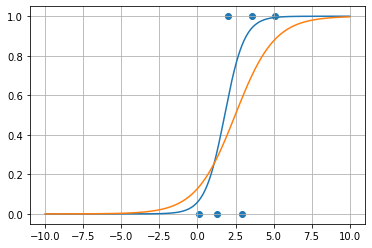

In [ ]:
x = np.linspace(-10, 10, num=1000)
plt.grid()
plt.plot(x, 1/(1+np.exp(-(m * x + b))))
plt.plot(x, 1/(1+np.exp(-(0.77324788 * x + -1.91736519))))
plt.scatter(df['x'],df['y'])

In [ ]:
roc_auc_score(df['y'],df['pred'])

0.888888888888889

In [ ]:
roc_auc_score(df['y'],df['lr_pred'])

0.888888888888889

In [ ]:
df = df[['x','y']].copy()
m,b = 1,1
n = 100
df['pred'] = 1/(1+np.exp(-(m * df['x'] + b)))

nu = 0.5
for i in range(n):


  df['err'] = df['y'] - df['pred']

  df['m_change'] = df['x']*df['err']
  df['b_change'] = df['err']

  m += nu*df['m_change'].mean()
  b += nu*df['b_change'].mean()

  df['pred'] = 1/(1+np.exp(-(m * df['x'] + b)))

  df['err'] = df['y'] - df['pred']
  df['err_abs'] = np.abs(df['err'])

  df['l'] = df['y']*(np.log(df['pred'])) + (1-df['y'])*(np.log(1-df['pred']))

  if i % 10 == 0:
    print(df['l'].sum())

-5.997971045638801
-3.595371292010104
-3.184962255079994
-2.9582312825952104
-2.824192793322556
-2.7399888612366707
-2.6844516088597916
-2.6463971980519827
-2.619527881386299
-2.6000975259001406


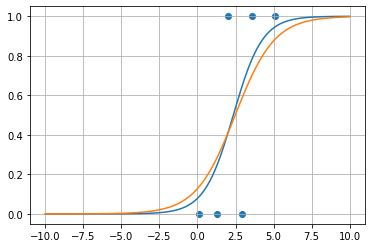

In [ ]:
x = np.linspace(-10, 10, num=1000)
plt.grid()
plt.plot(x, 1/(1+np.exp(-(m * x + b))))
plt.plot(x, 1/(1+np.exp(-(0.77324788 * x + -1.91736519))))
plt.scatter(df['x'],df['y'])

In [ ]:
df

,x,y,pred,err,m_change,b_change,err_abs,l
0,0.1,0,0.086625,-0.086625,-0.008738,-0.087378,0.086625,-0.090609
1,1.3,0,0.249472,-0.249472,-0.325632,-0.250486,0.249472,-0.286979
2,2.0,1,0.408577,0.591423,1.181384,0.590692,0.591423,-0.895076
3,2.9,0,0.638935,-0.638935,-1.852889,-0.638927,0.638935,-1.018697
4,3.6,1,0.786225,0.213775,0.771050,0.214181,0.213775,-0.240512
5,5.1,1,0.946342,0.053658,0.275605,0.054040,0.053658,-0.055151
